# Part 1: Data Preprocessing

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(':', '_').str.replace('/', '_').str.replace('__', '_')
df.replace('?', np.NaN, inplace=True)
df.drop('hinselmann', axis=1, inplace=True)
df.drop('schiller', axis=1, inplace=True)
df.drop('biopsy', axis=1, inplace=True)
df = df.apply(pd.to_numeric) 
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds_hepatitis_b,stds_hpv,stds_number_of_diagnosis,stds_time_since_first_diagnosis,stds_time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,NaN,NaN,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0


In [3]:
df.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud',
       'iud_(years)', 'stds', 'stds_(number)', 'stds_condylomatosis',
       'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis',
       'stds_vulvo-perineal_condylomatosis', 'stds_syphilis',
       'stds_pelvic_inflammatory_disease', 'stds_genital_herpes',
       'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv',
       'stds_hepatitis_b', 'stds_hpv', 'stds_number_of_diagnosis',
       'stds_time_since_first_diagnosis', 'stds_time_since_last_diagnosis',
       'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'citology'],
      dtype='object')

## Data Preprocessing

In [4]:
df.describe()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds_hepatitis_b,stds_hpv,stds_number_of_diagnosis,stds_time_since_first_diagnosis,stds_time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,citology
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,753.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.051282
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,0.036442,0.051503,0.302545,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.220701
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### What about Missing Values?

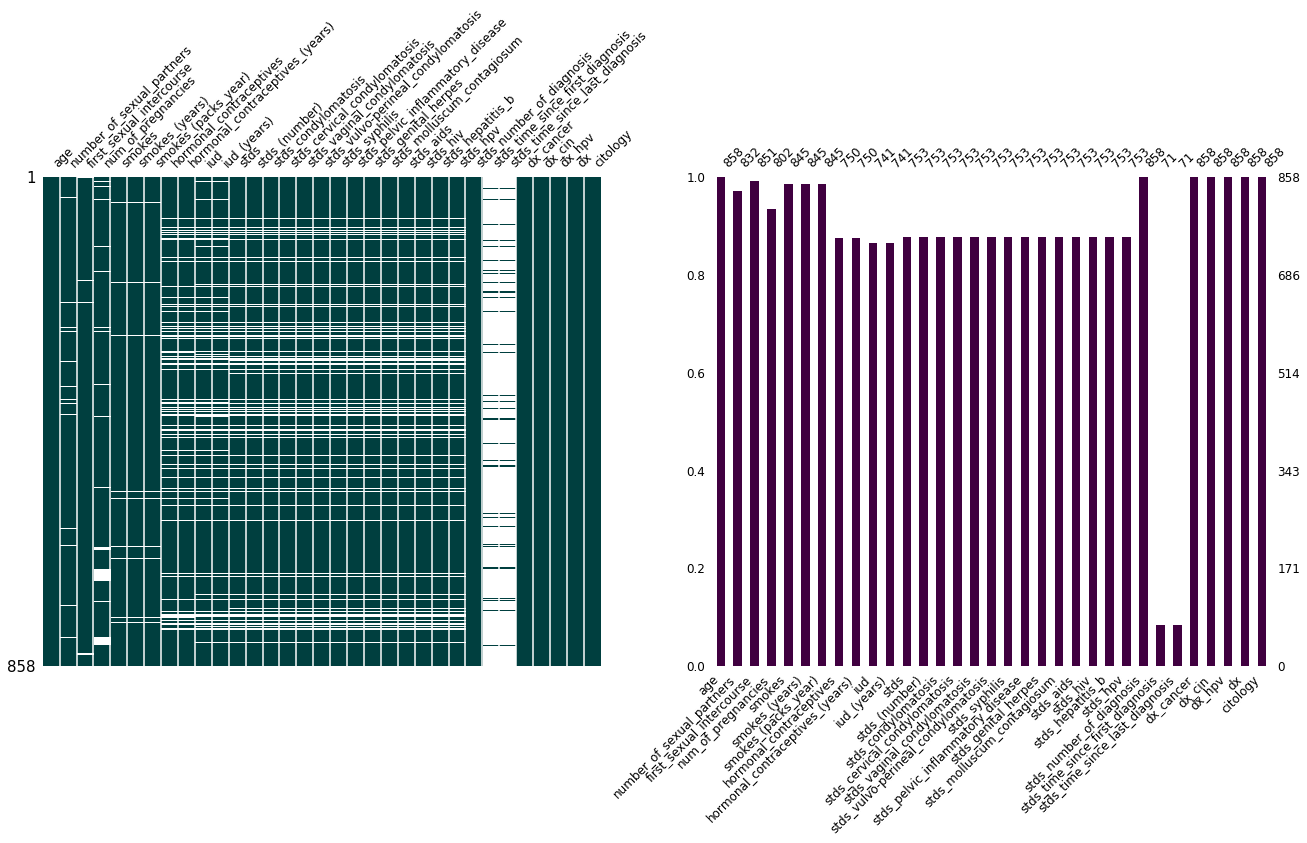

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,9))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

In [6]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

miss = dfmiss(df)
miss.head(50)

,data_type,unique_values,have_null?,how many?,%
age,int64,44,False,0,0.000000
number_of_sexual_partners,float64,12,True,26,3.030303
first_sexual_intercourse,float64,21,True,7,0.815851
num_of_pregnancies,float64,11,True,56,6.526807
smokes,float64,2,True,13,1.515152
smokes_(years),float64,30,True,13,1.515152
smokes_(packs_year),float64,62,True,13,1.515152
hormonal_contraceptives,float64,2,True,108,12.587413
hormonal_contraceptives_(years),float64,40,True,108,12.587413
iud,float64,2,True,117,13.636364


### Deleting columns that have around 92% missing data

In [7]:
df.drop('stds_time_since_first_diagnosis', axis=1, inplace=True)
df.drop('stds_time_since_last_diagnosis', axis=1, inplace=True)

#### Let's replace 12.24%-13.4% NaN values with 200, which is another label; 200 => Data Not Provided

In [8]:
cols_miss = ['hormonal_contraceptives',
 'hormonal_contraceptives_(years)',
 'iud',
 'iud_(years)',
 'stds',
 'stds_(number)',
 'stds_condylomatosis',
 'stds_cervical_condylomatosis',
 'stds_vaginal_condylomatosis',
 'stds_vulvo-perineal_condylomatosis',
 'stds_syphilis',
 'stds_pelvic_inflammatory_disease',
 'stds_genital_herpes',
 'stds_molluscum_contagiosum',
 'stds_aids',
 'stds_hiv',
 'stds_hepatitis_b',
 'stds_hpv']

In [9]:
for col in cols_miss:
    df[col].replace(np.NaN, 200, inplace=True) 

#### Which columns contain missing values?

In [10]:
d = dfmiss(df)
missing_val_col = d[d['have_null?'] == True].index.to_list()
missing_val_col

['number_of_sexual_partners',
 'first_sexual_intercourse',
 'num_of_pregnancies',
 'smokes',
 'smokes_(years)',
 'smokes_(packs_year)']

In [11]:
for col in missing_val_col:
    print (df[col].unique())
    

[ 4.  1.  5.  3.  2.  6. nan  7. 15.  8. 10. 28.  9.]
[15. 14. nan 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]
[ 1.  4.  2.  6.  3.  5. nan  8.  7.  0. 11. 10.]
[ 0.  1. nan]
[ 0.         37.         34.          1.26697291  3.         12.
         nan 18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16      ]
[0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
            nan 9.00000000e+00 1.60000000e+00 1.90000000e+01
 2.10000000e+01 3.20000000e-01 2.60000000e+00 8.00000000e-01
 1.50000000e+01 2.00000000e+00 5.70000000e+00 1.00000000e+00
 3.30000000e+00 3.50000000e+00 1.20000000e+01 2.50000000e-02
 2.75000000e+00 2.00000000e-01 1.40000000e+00 5.00000000e+00
 2.10000000e+00 7.0000000

### Random Sample Imputation

In [12]:
def impute_nan(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample
    
for col in missing_val_col:
    impute_nan(df, col)

age                                   0
number_of_sexual_partners             0
first_sexual_intercourse              0
num_of_pregnancies                    0
smokes                                0
smokes_(years)                        0
smokes_(packs_year)                   0
hormonal_contraceptives               0
hormonal_contraceptives_(years)       0
iud                                   0
iud_(years)                           0
stds                                  0
stds_(number)                         0
stds_condylomatosis                   0
stds_cervical_condylomatosis          0
stds_vaginal_condylomatosis           0
stds_vulvo-perineal_condylomatosis    0
stds_syphilis                         0
stds_pelvic_inflammatory_disease      0
stds_genital_herpes                   0
stds_molluscum_contagiosum            0
stds_aids                             0
stds_hiv                              0
stds_hepatitis_b                      0
stds_hpv                              0


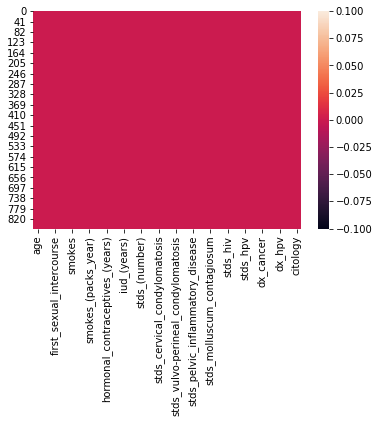

In [13]:
sns.heatmap(pd.isnull(df))
df.isnull().sum()

##### **Cool!

In [14]:
df.to_csv('preprocessed_risk_factors_cervical_cancer.csv')